
# 项目：Research the movie 

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>

## 简介
TMDb电影数据

In [17]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline


In [18]:
#Read data
filepath=os.path.join(os.path.abspath(''))
df = pd.read_csv(filepath+"/data/tmdb-movies.csv")
df_sorted=df.sort_values("popularity",ascending=False)

<a id='wrangling'></a>
## 数据整理
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。“演职人员 (cast) ”列中有一些奇怪的字符。先不要清洁它们，你可以保持原样，不去管它们。以“_adj”结尾的最后两列表示了考虑了通货膨胀之后的相关电影的预算和收入（以2010年美元的价值来计算）。
### 常规属性

In [19]:
# load database and check any data missing or with error
df_sorted.head(1)
print("null value number:\n{}".format(df_sorted.isnull().sum()))
print("\n")
print("duplicated value number:\n{}".format(df_sorted.duplicated().sum()))

null value number:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


duplicated value number:
1


Drop null and duplicate values

In [20]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
df_sorted.dropna(inplace=True)
df_sorted.isnull().sum()
df_sorted.drop_duplicates(inplace=True)
df_sorted.head()                 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


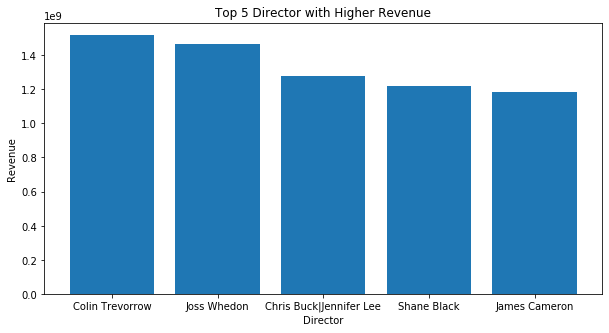

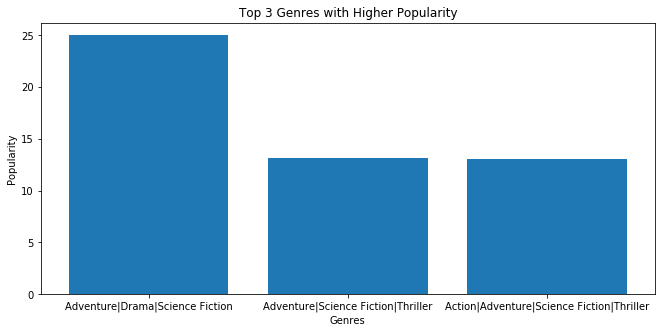

In [21]:
df_groupbyCompany=df_sorted.groupby('director').revenue.mean()
df_sortedCompany=df_groupbyCompany.sort_values(ascending=False)
df_sortedCompany=df_sortedCompany.head(5)
plt.subplots(figsize=(10, 5))
plt.bar(df_sortedCompany.index, df_sortedCompany)
plt.title('Top 5 Director with Higher Revenue')
plt.xlabel('Director')
plt.ylabel('Revenue');


# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
df_groupbyGenres=df_sorted.groupby('genres').popularity.mean()
df_groupbyGenres=df_groupbyGenres.sort_values(ascending=False)
df_groupbyGenres=df_groupbyGenres.head(3)

plt.subplots(figsize=(11, 5))
plt.bar(df_groupbyGenres.index, df_groupbyGenres)
plt.title('Top 3 Genres with Higher Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity');


### 研究问题 2（the research for the relationship between the popularity and the release year）

Text(0, 0.5, 'revenue')

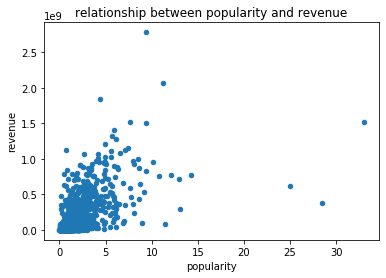

In [22]:
df_sorted.plot(x='popularity', y='revenue', kind='scatter');
plt.title("relationship between popularity and revenue")
plt.xlabel("popularity")
plt.ylabel("revenue")
#plt.xlim((0,9))
#plt.ylim((0,1.5e9))

In [23]:
df_sorted['revenue_popularity']=df_sorted.revenue/df_sorted.popularity
top_08 = df_sorted.query('revenue_popularity < 2.5e8')
df_sortedCompany.head(5)
df_groupbyGenres.head(3)


genres
Adventure|Drama|Science Fiction              24.949134
Adventure|Science Fiction|Thriller           13.112507
Action|Adventure|Science Fiction|Thriller    13.076946
Name: popularity, dtype: float64

<a id='conclusions'></a>
## 结论
研究问题1:
1. top 5 director with higher revenue
The directors of the movies that win higher revenue are:Colin Trevorrow,Joss Whedon,Chris Buck|Jennifer Lee,Shane Black,James Cameron
2. Top 3 Genres with higher revenue
Adventure|Drama|Science Fiction            24.949134
Adventure|Science Fiction|Thriller          13.112507
Action|Adventure|Science Fiction|Thriller      13.076946

研究问题2: The relationship between poplarity and revenue
Through ploting the relationship between popularity and revenue, very less movies achieve the revenue higher than 1.4e9 or win the popularity more than 9. The propotions of the popularity and revenue for each movie are mostly under 2.5e9.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1